## Desafío - Regresión Lineal - Maria Laura Oyarce

#### Este conjunto de datos es un registro de las ventas en el mercado de 7 especies comunes  de peces diferentes. Con este conjunto de datos, se busca realizar un modelo predictivo utilizando datos adecuados para máquinas y estimar el peso de los peces basándose en la longitud y ancho del pez. El conjunto de datos incluye información sobre varias dimensiones del pez, que se utilizan para predecir su peso. Cada fila en el conjunto de datos representa una entrada de un pez individual y contiene varias columnas con información relevante.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv('Fish.csv')

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


<Axes: >

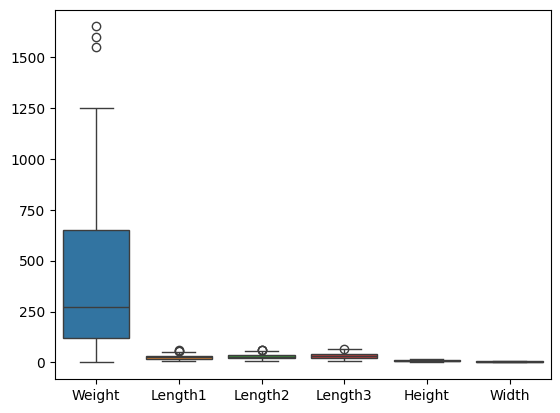

In [4]:
sns.boxplot(df)

Si bien no se logra apreciar muy bien en este boxplot, las columnas no presentan valores extremos. Algunas columnas presentan outliers, pero no creo que afecten en el estudio. Las columnas tampoco presentan valores nulos, por lo que podemos comenzar el desafío sin problemas.

1. Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un cilindro. Para un cilindro con una base circular, el área de la base (A) es igual a πr², donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos bases circulares.

In [5]:
#Agregamos la columna que corresponderá al volumen del pez asumiendo forma cilíndrica
df['Volume']=np.pi*df['Height']*(df['Width']/2)**2

2. Verifica la correlación posible entre las variables, numérica y gráficamente. ¿Aumenta la correlación al añadir el volumen? Explica.

Text(0.5, 1.0, 'Matriz de Correlación')

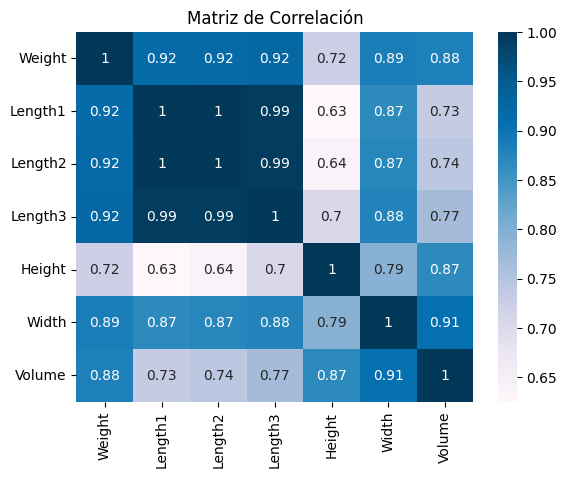

In [6]:
#Dejo el df solo con las columnas que son de tipo float ya que la funcion corr() me arrojó un error debido a la
#primera columna del dataframe
df_numeric=df[['Weight','Length1','Length2','Length3','Height','Width','Volume']]
#Graficamos la matriz de correlación entre las variables
sns.heatmap(df_numeric.corr(), annot=True, cmap=plt.cm.PuBu)
plt.title("Matriz de Correlación")

Text(0.5, 1.0, 'Matriz de Correlación')

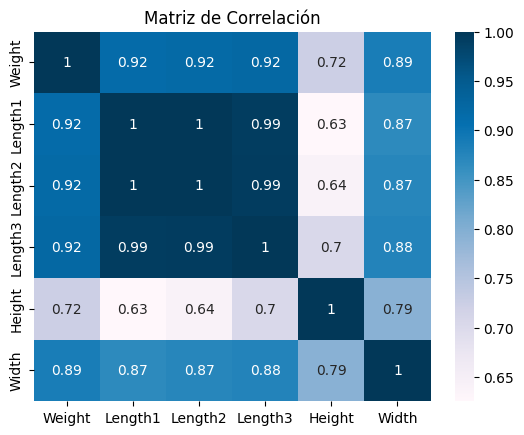

In [7]:
#sin considerar la columna de volumen
df_numeric2=df[['Weight','Length1','Length2','Length3','Height','Width']]
sns.heatmap(df_numeric2.corr(), annot=True, cmap=plt.cm.PuBu)
plt.title("Matriz de Correlación")

Al incluir el volumen, se introduce una correlación fuerte con el peso y el ancho, de 0.88 y 0.91 respectivamente, pero éstas no superan los valores de correlación de las longitudes con el peso (0.92). Por lo que las longitudes siguen siendo mejores predictoras que el volumen. El resto de correlaciones no presentan variaciones cuando se introduce el volumen.

Por lo tanto, el volumen si puede aportar información valiosa, pero no mejorará sustancialmente la correlación con el peso. Pero si, podría ser útil si se combina con otras variables en un modelo predictivo.

3. Construye un modelo de regresión lineal que relacione el volumen y el peso de los peces. Realiza una breve evaluación del modelo y grafícalo.

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     549.9
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           3.65e-53
Time:                        13:32:11   Log-Likelihood:                -1040.5
No. Observations:                 159   AIC:                             2085.
Df Residuals:                     157   BIC:                             2091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7401     19.745      2.975      0.0

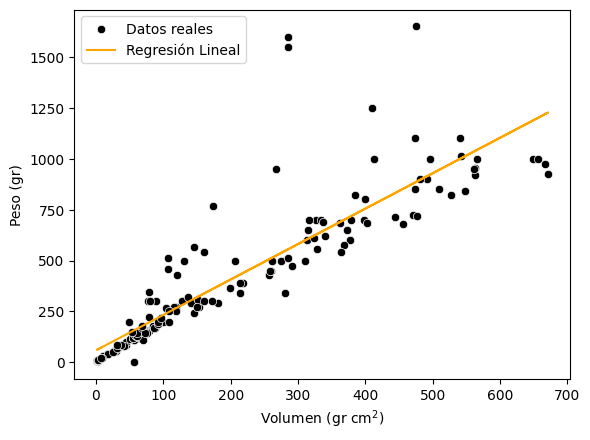

In [8]:
#Definimos las variables del modelo de regresión lineal con el volumen como predictor
X=sm.add_constant(df['Volume']) 
y=df["Weight"]

#Creamos el modelo de regresion utilizando la función de minimos cuadrados ordinarios de statsmodels
model=sm.OLS(y, X).fit()

#Imprimimos los parámetros de la regresion lineal
print(model.summary())

#Graficamos la regresión lineal y los datos de peso y volumen
sns.scatterplot(x=df['Volume'], y=df['Weight'], color='k',label='Datos reales')
plt.plot(df['Volume'], model.predict(X), color='orange', label='Regresión Lineal')
plt.xlabel('Volumen (gr cm$^2$)')
plt.ylabel('Peso (gr)')
plt.legend()

Text(0.5, 0, 'Volumen')

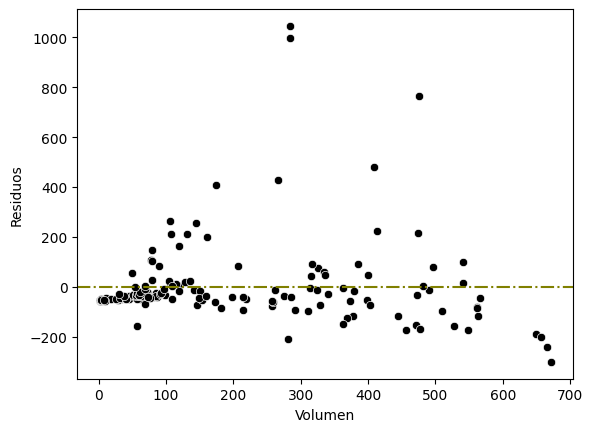

In [9]:
#Graficamos los residuos para evaluar el modelo de regresión
residuals=model.resid
sns.scatterplot(x=df['Volume'],y=residuals,color='k')
plt.axhline(0,color='olive',ls='-.')
plt.ylabel('Residuos')
plt.xlabel('Volumen')

In [12]:
#Calculamos el MSE, RMSE, R^2 y MAE para evaluar el modelo

mse=((df['Volume']-model.predict(X))**2).mean() #error cuadratico medio
rmse=mse/((df['Volume']-df['Volume'].mean())**2).mean() #raiz del error cuadratico medio
R2=model.rsquared #r cuadrado
mae= (abs(df['Volume']-model.predict(X))).mean() #error medio absoluto

print ('MSE:',mse)
print ('EMSE:',rmse)
print ('R^2:',R2)
print ('MAE:',mae)

MSE: 59161.721086931
EMSE: 1.8073624663444874
R^2: 0.777891062387765
MAE: 203.11649483050996


De los gráficos de regresión lineal y residuos podemos apreciar que los valores tienen una alta dispersión, por lo que el modelo no se ajusta tan bien como debería.

En el caos de las métricas de evaluación del modelo, el R^2 dice que el modelo tiene una capacidad de predicción aceptable, pero está lejos de ser perfecto. El alto valor del error cuadrático medio (MSE) y el error cuadrático medio estandar indican mayores errores en la predicción.

En conclusión, podemos decir que si bien el modelo se ajusta a los datos, los valores de las predicciones estarán bastante alejados de los valores reales.

4. ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces? Explica.

In [13]:
#Definimos una función para calcular las métricas de todos los modelos
def evaluar_modelo(y_real, y_pred):
    mae=mean_absolute_error(y_real, y_pred) #error medio absoluto
    mse=mean_squared_error(y_real, y_pred) #error cuadratico medio
    rmse=np.sqrt(mse) #raiz del error cuadratico medio
    r2=r2_score(y_real, y_pred) #r cuadrado
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R^2': r2}

Métricas para Bream
{'MAE': 53.691894543160146, 'MSE': 4348.347433038185, 'RMSE': 65.94200052347658, 'R^2': 0.8977257503946646}
Métricas para Roach
{'MAE': 16.00375802494968, 'MSE': 835.834071570837, 'RMSE': 28.91079506984955, 'R^2': 0.8884966948820913}
Métricas para Whitefish
{'MAE': 69.79582940184565, 'MSE': 11147.577025084005, 'RMSE': 105.5820866675972, 'R^2': 0.8604430443163478}
Métricas para Parkki
{'MAE': 4.474780402313126, 'MSE': 25.588555265321727, 'RMSE': 5.058513147686949, 'R^2': 0.9954618251295636}
Métricas para Perch
{'MAE': 40.182575670221794, 'MSE': 3835.9805844121624, 'RMSE': 61.93529352810207, 'R^2': 0.9676780219281955}
Métricas para Pike
{'MAE': 125.08658752755021, 'MSE': 36222.43090293974, 'RMSE': 190.32191387998319, 'R^2': 0.8423822350037086}
Métricas para Smelt
{'MAE': 1.2017203438782542, 'MSE': 1.9330621283411378, 'RMSE': 1.3903460462565203, 'R^2': 0.8780422071508336}


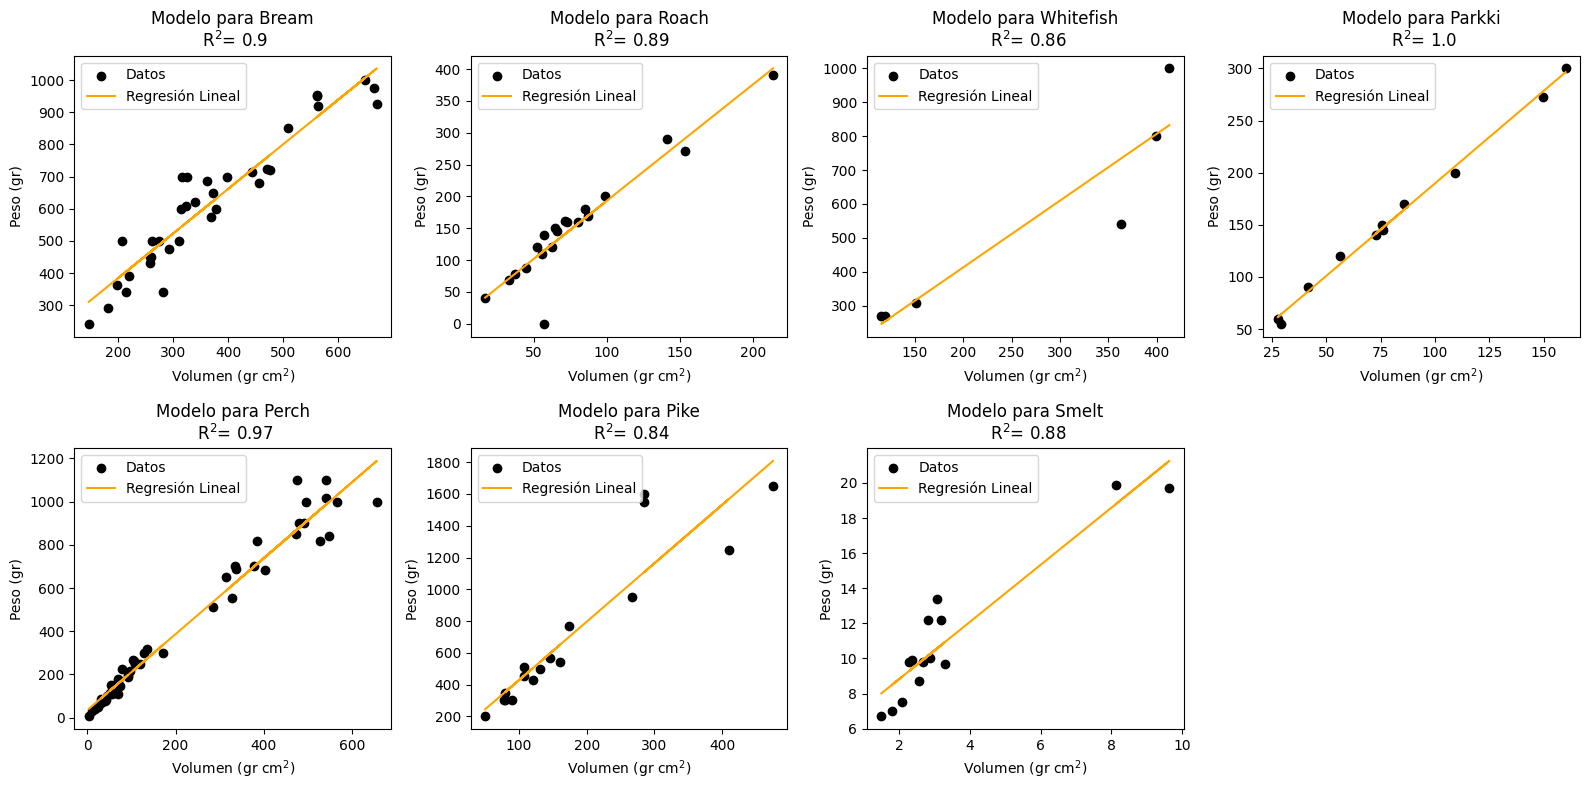

In [14]:
#Extraemos las especies
species_list=df['Species'].unique()
species_models=[]
metricas_models=[]
fig, axs=plt.subplots(2, 4, figsize=(16, 8))

for i,specie in enumerate(species_list):
    data=df[df['Species']==specie]
    #Definimos las variables del modelo
    X=sm.add_constant(data['Volume'])
    y=data['Weight']

    #Calculamos el modelo
    model=sm.OLS(y,X).fit()
    species_models.append([model.params,model.rsquared])
    print ('Métricas para '+str(specie))
    print (evaluar_modelo(data['Weight'],model.predict(X)))
    metricas_models.append(evaluar_modelo(data['Weight'],model.predict(X)))

    #Graficamos los datos de cada especie con su respectiva regresion lineal
    ax = axs[i // 4, i % 4] 
    ax.scatter(data['Volume'], data['Weight'], color='k',label='Datos')
    ax.plot(data['Volume'], model.predict(X), color='orange', label='Regresión Lineal')
    ax.set_title('Modelo para '+str(specie)+'\n R$^2$= '+str(round(model.rsquared,2)))
    ax.set_xlabel('Volumen (gr cm$^2$)')
    ax.set_ylabel('Peso (gr)')
    ax.legend()
fig.delaxes(axs[1,3])
plt.tight_layout()

En general, los modelos específicos por especie tienen valores de R^2 más altos que el modelo general, lo que indica que la relación entre volumen y peso varía entre especies, y que un único modelo no es suficiente para reproducir los datos combinados.

Las métricas de evaluación del modelo también son menores a la del modelo único, por lo que podemos decir que para hacer predicciones más precisas, es mejor ajustar modelos para cada especie en lugar de una regresión lineal general.

5. Construye un modelo de regresión que relacione dos o más variables con el peso de los peces. Realiza una breve evaluación del modelo.

In [15]:
#Definimos las variables, en este caso relacionaré todas las variables con el peso
X_multi=sm.add_constant(df[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Volume']])
y_multi=df['Weight']

#Calculamos el modelo
model_multi=sm.OLS(y_multi, X_multi).fit()
y_pred_multi=model_multi.predict(X_multi)

#Imprimimos los resultados del modelo
print(model_multi.summary())
print ('')

#Utilizamos la función definida anteriormente para calcular las métricas y evaluar el modelo
print('Métricas para el modelo múltiple:\n', evaluar_modelo(y_multi, y_pred_multi))

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     481.7
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           3.42e-96
Time:                        13:32:28   Log-Likelihood:                -921.89
No. Observations:                 159   AIC:                             1858.
Df Residuals:                     152   BIC:                             1879.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -170.5538     30.547     -5.583      0.0

El modelo múltiple es mucho mejor que el modelo general, ya que logra reducir los errores y aumentar R^2 significativamente. Por otro lado,el modelo múltiple se acerca a los modelos individuales, lo que sugiere que incluir más variables logra compensar las diferencias entre especies.

Si el objetivo es hacer predicciones generales, el modelo múltiple es una excelente opción porque explica el 95% de la variabilidad del peso y evita la necesidad de entrenar modelos separados.Pero si se quiere la máxima precisión para una especie específica, es preferible usar un modelo individual por especie, ya que estos modelos tienen ajustes muy altos.